In [1]:
import numpy as np

from one.api import ONE
one = ONE()
brain_acronym = 'VISp1'

# query sessions endpoint
sessions = one.search(atlas_acronym=brain_acronym, query_type='remote')
print(f'No. of detected sessions: {len(sessions)}\n')

# Print the first 5 eids
from pprint import pprint  # Print larger lists more clearly
pprint(sessions[:5])

eid = '0cf6d255-8f2f-463e-84fb-c54bacb79f51'
pids, labels = one.eid2pid(eid)
for pid, name in zip(pids, labels):
  print(f'pid: {pid}, pname: {name}')
pid = 'c5b9e063-f640-4936-b851-f7602cb6659b'
eid, pname = one.pid2eid(pid)

trials = one.load_object(eid, 'trials')
print('keys of trials : ', list(trials.keys()))

from IPython.display import display # import module to display dataframe nicely
trials_df = trials.to_df()
display(trials_df)

No. of detected sessions: 29

['6899a67d-2e53-4215-a52a-c7021b5da5d4',
 'ca4ecb4c-4b60-4723-9b9e-2c54a6290a53',
 '642c97ea-fe89-4ec9-8629-5e492ea4019d',
 '2584ce3c-db10-4076-89cb-5d313138dd38',
 '0cf6d255-8f2f-463e-84fb-c54bacb79f51']
pid: c5b9e063-f640-4936-b851-f7602cb6659b, pname: probe00
keys of trials :  ['goCueTrigger_times', 'stimOff_times', 'goCue_times', 'response_times', 'choice', 'stimOn_times', 'contrastLeft', 'contrastRight', 'probabilityLeft', 'feedback_times', 'feedbackType', 'rewardVolume', 'firstMovement_times', 'intervals']


,goCueTrigger_times,stimOff_times,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,probabilityLeft,feedback_times,feedbackType,rewardVolume,firstMovement_times,intervals_0,intervals_1
0,52.414596,53.971169,52.415391,52.923494,-1.0,52.487851,NaN,0.2500,0.5,52.923574,1.0,1.5,52.738333,49.629703,54.471192
1,57.927887,59.387694,57.928707,58.343287,1.0,57.927673,1.0,NaN,0.5,58.343365,1.0,1.5,58.058333,55.109389,59.887788
2,61.144085,62.444222,61.144918,61.399885,1.0,61.143918,1.0,NaN,0.5,61.399959,1.0,1.5,61.184333,60.471986,62.944286
3,65.120969,66.454121,65.121854,65.408566,-1.0,65.120754,NaN,1.0000,0.5,65.408658,1.0,1.5,65.232333,63.490984,66.954154
4,70.094346,71.477418,70.095123,70.421045,-1.0,70.094223,NaN,0.0625,0.5,70.421157,1.0,1.5,70.248333,67.521247,71.977446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,2717.450312,2719.210652,2717.451061,2718.157211,1.0,2717.450128,1.0,NaN,0.2,2718.157324,1.0,1.5,2717.912333,2716.934813,2719.710710
698,2720.900007,2725.843588,2720.900649,2724.788208,-1.0,2720.899883,NaN,1.0000,0.2,2724.788294,1.0,1.5,2724.456333,2720.321607,2726.343610
699,2727.717408,2729.210252,2727.718234,2728.150708,-1.0,2727.717268,NaN,1.0000,0.2,2728.150791,1.0,1.5,2727.854333,2726.980408,2729.710310
700,2731.050403,2733.866019,2731.051168,2732.810190,-1.0,2731.050268,NaN,1.0000,0.2,2732.810292,1.0,1.5,2732.496333,2730.314708,2734.366081




---


⚡ **INFORMATION:** Most datasets are also described in this [Google Document](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.hnjqyfnroyya)


---



### 🏠 Example 2: Characterising the electrophysiology data of a single insertion

In [2]:
# 1. Load in spikesorting data for pid
from brainbox.io.one import SpikeSortingLoader
from iblatlas.atlas import AllenAtlas

ba = AllenAtlas()

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

# 2. Evaluate the number of good clusters - those with a label of 1
good_cluster_idx = clusters['label'] == 1
clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

all_clusters = clusters['label'].shape
good_clusters = clusters_good['label'].shape
print(f'Total no. of clusters: {all_clusters}')
print(f'Number of good clusters: {good_clusters}')

# 3. Find the location of clusters in brain
# The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
acronyms = clusters_good['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
for a, c in zip(unique_acronyms, count):
  print(f'{a}: {c}')

c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


Total no. of clusters: (552,)
Number of good clusters: (60,)
CA1: 7
DG-mo: 8
DG-po: 5
DG-sg: 12
MB: 1
MGd: 2
MGv: 4
PIL: 3
PP: 3
VISp2/3: 2
VISp4: 2
VISp5: 3
VISp6a: 5
VISp6b: 2
or: 1


C:\Users\stell\AppData\Local\Temp\ipykernel_24784\2831819201.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
C:\Users\stell\AppData\Local\Temp\ipykernel_24784\2831819201.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))


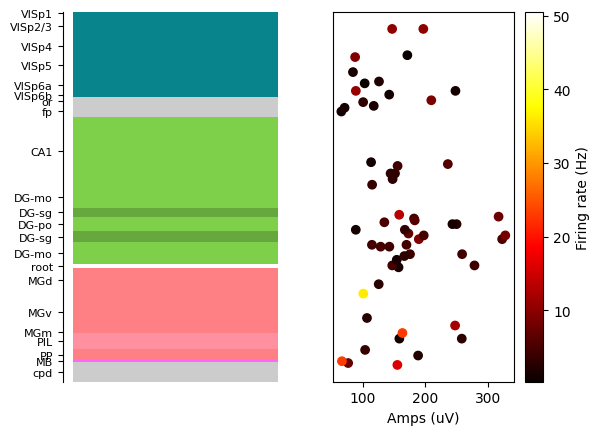

In [3]:
# 5. Plot firing rate and brain locations
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from brainbox.ephys_plots import plot_brain_regions
clusters_good.keys()

# 4. Compute the firing rate of each cluster - access it from the clusters object
firing_rate = clusters_good['firing_rate']

norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)

fig, axs = plt.subplots(1, 2)
# Plot the brain regions through which the channels on the insertion pass
plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
# Plot scatter plot of cluster depths vs cluster amp with firing rate encoded in colour
# Map firing rate values to colours
norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)
axs[1].scatter(clusters_good['amp_median'] * 1e6, clusters_good['depths'], c=firing_rate_cols)
axs[1].set_xlabel('Amps (uV)')
axs[1].get_yaxis().set_visible(False)
# Add colorbar
cbar = fig.colorbar(mapper, ax=axs[1])
cbar.set_label('Firing rate (Hz)')

### Example 3: Characterising event aligned activity of a single cluster

In this example we will show how to


1.   Load in trials data for a single session and spikesorting data for a single insertion
2.   Get spikes for chosen cluster
3.   Compute and plot firing rate of cluster around trial event
4.   Compute and plot peristimulus time histograms for different trial conditions (left vs right, correct vs incorrect)



In [4]:
# 1. Load in trials data and spikesorting data
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from one.api import ONE
from iblatlas.atlas import AllenAtlas
import numpy as np

ba = AllenAtlas()
one = ONE()
pid = '92822789-608f-44a6-ad64-fe549402b2df'
# pid = 'c5b9e063-f640-4936-b851-f7602cb6659b'
eid, _ = one.pid2eid(pid)

sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

# 2. Get spikes for a single cluster
# Get the 3th good cluster
region_str = 'VISp2/3'
good_label = 1

region_mask = (clusters['acronym'] == region_str)
good_mask = (clusters['label'] == good_label)

selected_mask = region_mask & good_mask
selected_cluster_ids = np.where(selected_mask)[0]
cluster_id = selected_cluster_ids[3]

# 3. Compute firing rate of cluster around trial event and plot as a raster
# Find times when stimulus appears
events = sl.trials['stimOn_times'].values  # 또는 .to_numpy()

from brainbox.singlecell import bin_spikes
# Compute number of spikes in 0.05s bins between 0.5s before stimulus presentation to 1s after stimulus presentation
bin_size = 0.05
pre_time = 1
post_time = 3

print('trial number: ', len(sl.trials))
print('good_cluster number: ', len(selected_cluster_ids))

c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


trial number:  620
good_cluster number:  9


Text(0.5, 1.0, 'firing rate of cluster 581 around trial event')

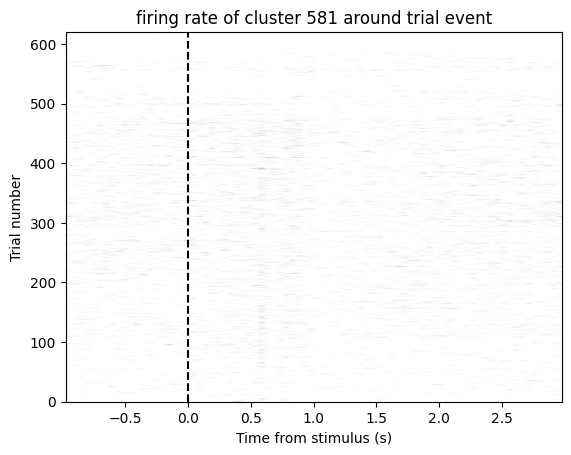

In [5]:
# 특정 뉴런에 대한 PSTH 시각화

# cluster_id = np.where(clusters['label'] == 1)[0][3]

# Get the index of the spikes object for the chosen cluster
spikes_idx = spikes['clusters'] == cluster_id

spike_raster, times = bin_spikes(spikes.times[spikes_idx], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
spikes_raster = spike_raster / bin_size

fig, ax = plt.subplots()
ax.imshow(spike_raster, extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')
ax.set_title(f'firing rate of cluster {cluster_id} around trial event')


Text(0.5, 1.0, 'Correct vs Incorrect Trials')

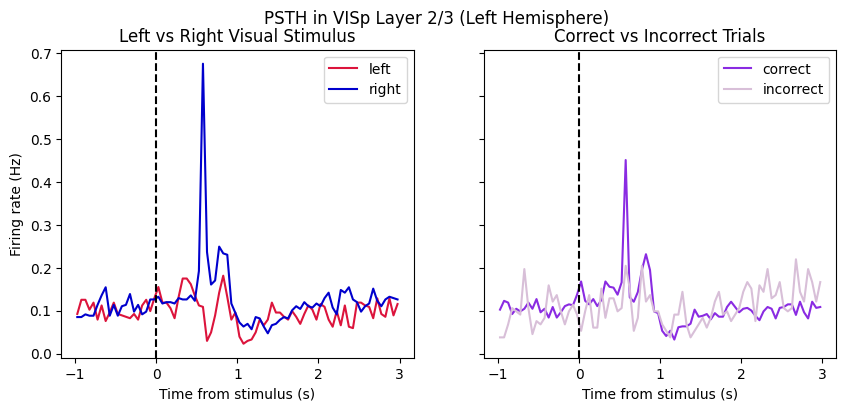

In [6]:
# 4. Compute peri stimulus time histogram for different trial events
# Compute psth for left vs right stimulus trials
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
psth_left = np.nanmean(spike_raster[left_idx], axis=0)
psth_right = np.nanmean(spike_raster[right_idx], axis=0)

# Compute psth for correct vs incorrect trials
correct_idx = sl.trials['feedbackType'] == 1
incorrect_idx = sl.trials['feedbackType'] == -1
psth_correct = np.nanmean(spike_raster[correct_idx], axis=0)
psth_incorrect = np.nanmean(spike_raster[incorrect_idx], axis=0)

# Plot the psths
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle('PSTH in VISp Layer 2/3 (Left Hemisphere)')
axs[0].plot(times, psth_left, c='crimson')
axs[0].plot(times, psth_right, c='mediumblue')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left vs Right Visual Stimulus')

axs[1].plot(times, psth_correct, c='blueviolet')
axs[1].plot(times, psth_incorrect, c='thistle')
axs[1].legend(['correct', 'incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Correct vs Incorrect Trials')

Text(0.5, 1.0, 'Right Stimulus')

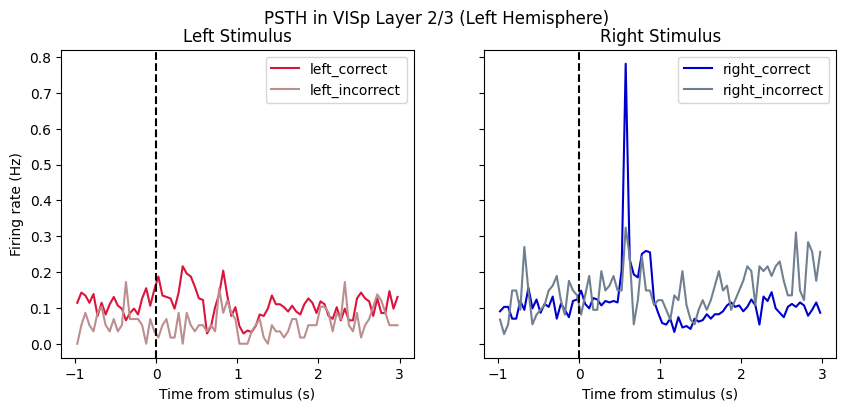

In [7]:
# 4. Compute peri stimulus time histogram for different trial events

left_correct_idx = left_idx & (sl.trials['feedbackType'] == 1)
left_incorrect_idx = left_idx & (sl.trials['feedbackType'] == -1)
psth_left_correct = np.nanmean(spike_raster[left_correct_idx], axis=0)
psth_left_incorrect = np.nanmean(spike_raster[left_incorrect_idx], axis=0)

right_correct_idx = right_idx & (sl.trials['feedbackType'] == 1)
right_incorrect_idx = right_idx & (sl.trials['feedbackType'] == -1)
psth_right_correct = np.nanmean(spike_raster[right_correct_idx], axis=0)
psth_right_incorrect = np.nanmean(spike_raster[right_incorrect_idx], axis=0)


# Plot the psths
# figure 크기 조절
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle('PSTH in VISp Layer 2/3 (Left Hemisphere)')

axs[0].plot(times, psth_left_correct, c='crimson')
axs[0].plot(times, psth_left_incorrect, c='rosybrown')
axs[0].legend(['left_correct', 'left_incorrect'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left Stimulus')

axs[1].plot(times, psth_right_correct, c='mediumblue')
axs[1].plot(times, psth_right_incorrect, c='slategray')
axs[1].legend(['right_correct', 'right_incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Right Stimulus')


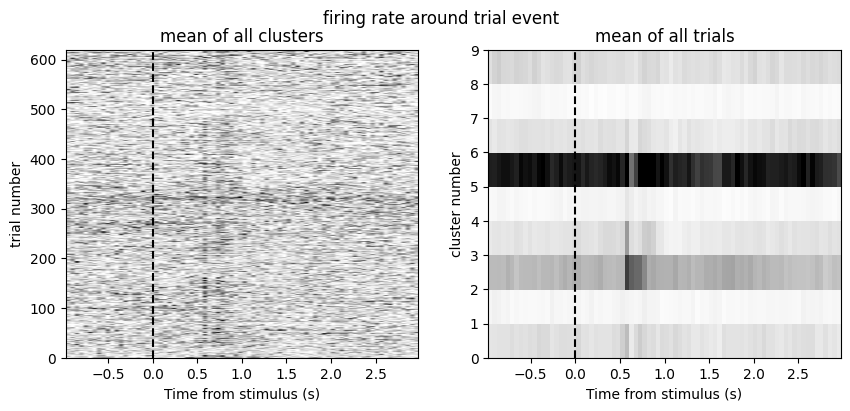

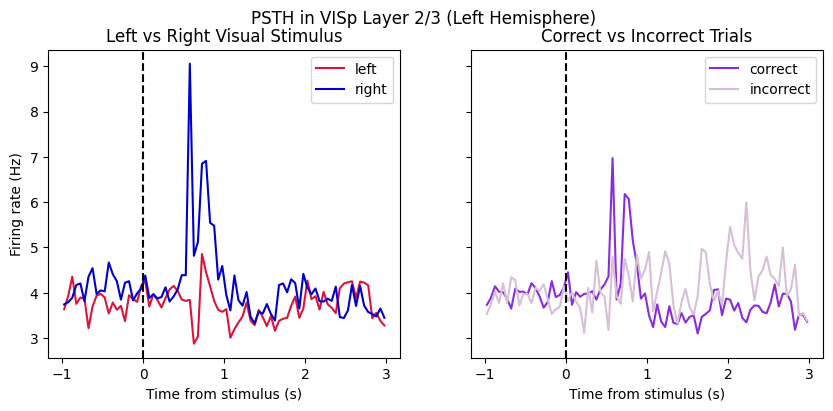

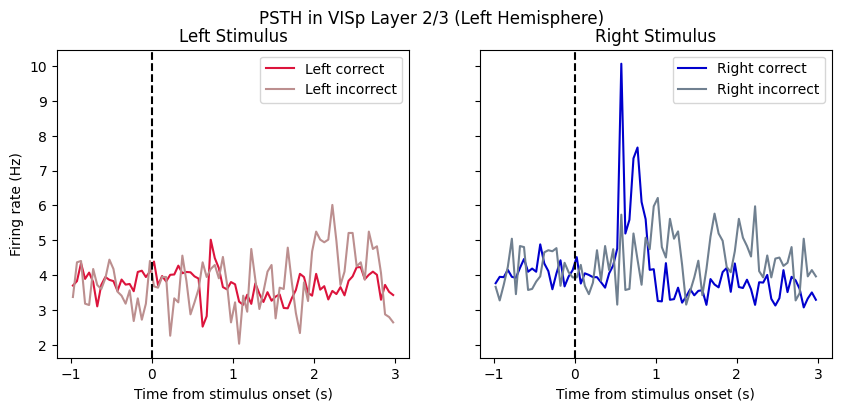

In [8]:
# 4. 모든 뉴런 PSTH(=뉴런 & trials 평균)
# spike_raster_all의 shape = (N_clusters, N_trials, N_bins)
spike_raster_all = []
for cluster_id in selected_cluster_ids:
    spikes_idx = spikes['clusters'] == cluster_id
    spike_times_cluster = spikes['times'][spikes_idx]
    
    spike_raster, times = bin_spikes(
        spike_times_cluster, 
        events, 
        pre_time=pre_time, 
        post_time=post_time, 
        bin_size=bin_size
    )
    # Hz 단위로 변환 (count / bin_size)
    spike_raster_hz = spike_raster / bin_size
    spike_raster_all.append(spike_raster_hz)

# stack 후 shape를 살펴보면 (nClusters, nTrials, nBins)
spike_raster_all = np.stack(spike_raster_all, axis=0)

# (뉴런, trial) 양방향 평균 => PSTH (nBins,)
psth_all = np.nanmean(spike_raster_all, axis=(0,1))

# 5. PSTH 시각화
# 뉴런에 대해 평균
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('firing rate around trial event')
axs[0].imshow(np.nanmean(spike_raster_all,axis=0), extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('trial number')
axs[0].set_title(f'mean of all clusters')

# trial에 대해 평균
axs[1].imshow(np.nanmean(spike_raster_all,axis=1), extent=[times[0], times[-1], 0, len(selected_cluster_ids)], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_ylabel('cluster number')
axs[1].set_title(f'mean of all trials')

# left/right trial PSTH: (selected 클러스터 전부, left/right trial만 골라서) 평균
psth_left = np.nanmean(spike_raster_all[:, left_idx, :], axis=(0,1))
psth_right = np.nanmean(spike_raster_all[:, right_idx, :], axis=(0,1))
# correct/incorrect trial PSTH: (selected 클러스터 전부, correct/incorrect trial만 골라서) 평균
psth_correct = np.nanmean(spike_raster_all[:, correct_idx, :], axis=(0,1))
psth_incorrect = np.nanmean(spike_raster_all[:, incorrect_idx, :], axis=(0,1))

# Plot the psths
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle('PSTH in VISp Layer 2/3 (Left Hemisphere)')
axs[0].plot(times, psth_left, c='crimson')
axs[0].plot(times, psth_right, c='mediumblue')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left vs Right Visual Stimulus')

axs[1].plot(times, psth_correct, c='blueviolet')
axs[1].plot(times, psth_incorrect, c='thistle')
axs[1].legend(['correct', 'incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Correct vs Incorrect Trials')

# left correct vs incorrect
psth_left_correct = np.nanmean(spike_raster_all[:, left_correct_idx, :], axis=(0,1))
psth_left_incorrect = np.nanmean(spike_raster_all[:, left_incorrect_idx, :], axis=(0,1))

# right correct vs incorrect
psth_right_correct = np.nanmean(spike_raster_all[:, right_correct_idx, :], axis=(0,1))
psth_right_incorrect = np.nanmean(spike_raster_all[:, right_incorrect_idx, :], axis=(0,1))

# 7. 시각화
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle('PSTH in VISp Layer 2/3 (Left Hemisphere)')
axs[0].plot(times, psth_left_correct, c='crimson')
axs[0].plot(times, psth_left_incorrect, c='rosybrown')
axs[0].legend(['Left correct', 'Left incorrect'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus onset (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left Stimulus')


axs[1].plot(times, psth_right_correct, c='mediumblue')  
axs[1].plot(times, psth_right_incorrect, c='slategray')
axs[1].legend(['Right correct', 'Right incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus onset (s)')
axs[1].set_title('Right Stimulus')
plt.show()

# FAQ



Where can I find out more information about the IBL?
- [IBL website](https://www.internationalbrainlab.com/)

How can I easily explore the IBL data available?
- [IBL visualisation website](https://viz.internationalbrainlab.org/)

Where can I find more information about the Brain-wide map?
- [Brain-wide map technical paper](https://figshare.com/articles/preprint/Data_release_-_Brainwide_map_-_Q4_2022/21400815)

Where can I find out more information about available dataset releases?
- [Publically available IBL data](https://int-brain-lab.github.io/iblenv/public_docs/public_introduction.html)

Where can I read more about the science conducted in the IBL?
- [List of publications](https://www.internationalbrainlab.com/publications)

Where can I find out more information about ONE?
- [ONE documentation](https://int-brain-lab.github.io/ONE/)

Where can I find out more information about ibllib and brainbox?
- [ibllib documentation](https://int-brain-lab.github.io/iblenv/010_api_reference.html)

Where can I find out more information about iblatlas?
- [Atlas examples](https://int-brain-lab.github.io/iblenv/atlas_examples.html)

Where can I find out more information about different IBL datasets?
- [Description of public datasets](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.hnjqyfnroyya)

Where can I find help?
- Issues with the data? Post an issue here: https://neurostars.org/ with the tag `ibl`
- Alternatively post an issue here: https://github.com/int-brain-lab/iblenv/issues
- General questions about the datasets or publications? Email: info@internationalbrainlab.org

